In [1]:
from tensorly.kruskal import kruskal_to_tensor
from tensortools import cp_als, cp_rand
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1234)
%matplotlib inline

In [2]:
# params
N = 300
ndim = 3
R = 5
sigma = 0.1

# generate data
true_factors = [np.random.randn(N, R) for _ in range(ndim)]
data = kruskal_to_tensor(true_factors)
data += sigma*np.random.randn(*data.shape)

In [3]:
fit_kwargs = {"init_factors" : [np.random.randn(N, R) for _ in range(ndim)]}

In [4]:
# run fits
print('CP-ALS\n'+'-'*30)
als_factors, als_info = cp_als(data, R, **fit_kwargs)
print('\nCP-RAND\n'+'-'*30)
rand_factors, rand_info = cp_rand(data, R, **fit_kwargs)

CP-ALS
------------------------------
converged in 7 iterations.
CP-RAND
------------------------------
converged in 26 iterations.

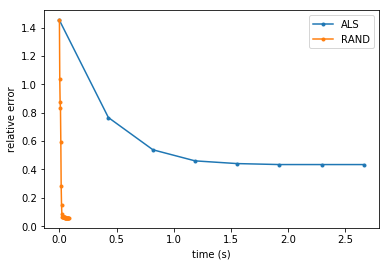

In [5]:
plt.figure()
plt.plot(als_info['t_hist'], als_info['err_hist'], '.-', label='ALS')
plt.plot(rand_info['t_hist'], rand_info['err_hist'], '.-', label='RAND')
plt.legend(loc='best')
plt.ylabel('relative error')
plt.xlabel('time (s)')

## CPRAND estimate vs. true factors

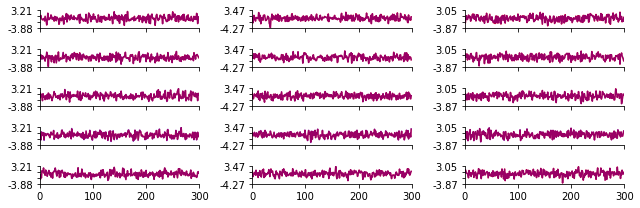

In [6]:
from tensortools import plot_factors, align_factors

rf, tf, _ = align_factors(rand_factors, true_factors)

fig, ax, po = plot_factors(tf, figsize=(9,3), line_kw=dict(color='r'))
plot_factors(rf, fig=fig, line_kw=dict(color='b', alpha=0.4));

## ALS estimate vs. true factors

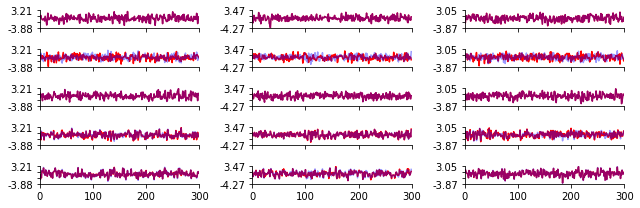

In [7]:
af, tf, _ = align_factors(als_factors, true_factors)

fig, ax, po = plot_factors(tf, figsize=(9,3), line_kw=dict(color='r'))
plot_factors(af, fig=fig, line_kw=dict(color='b', alpha=0.4));